<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week5/Day4/Exercise/Mini_Project_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [7]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0
year,344.0,2008.029070,0.818356,2007.0,2007.000,2008.00,2009.0,2009.0


In [9]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [62]:
cdata = df.copy()

In [63]:
cdata.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [64]:
# Check for missing values
missing_values = cdata[cdata.isna().any(axis=1)]

# Display the rows where missing values exist
print(missing_values)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
178  Gentoo     Biscoe            44.5           14.3              216.0   
218  Gentoo     Biscoe            46.2           14.4              214.0   
256  Gentoo     Biscoe            47.3           13.8              216.0   
268  Gentoo     Biscoe            44.5           15.7              217.0   
271  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex       year  
3            NaN  NaN 2007-01-01  
8         3475.0 

In [65]:
#filling missing values with mean from each column
cdata['bill_length_mm'].fillna(cdata['bill_length_mm'].mean(),inplace=True)
cdata['bill_depth_mm'].fillna(cdata['bill_depth_mm'].mean(),inplace=True)
cdata['flipper_length_mm'].fillna(cdata['flipper_length_mm'].mean(),inplace=True)
cdata['body_mass_g'].fillna(cdata['body_mass_g'].mean(),inplace=True)

# Define choices
choices = ['male', 'female']

# Get indices of missing values in 'sex' column
missing_indices = cdata[cdata['sex'].isnull()].index

# Fill missing values with random choices
cdata.loc[missing_indices, 'sex'] = np.random.choice(choices, size=len(missing_indices))


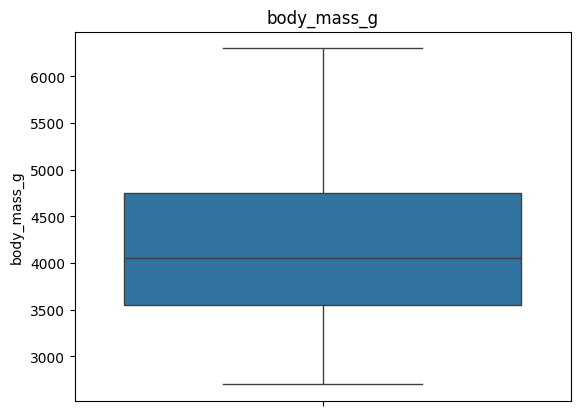

In [66]:
# Distribution of score through box plot, checking no outliers
sns.boxplot(data=cdata,y='body_mass_g')

plt.title('body_mass_g')
plt.show()

In [67]:
cdata.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

Data distribution

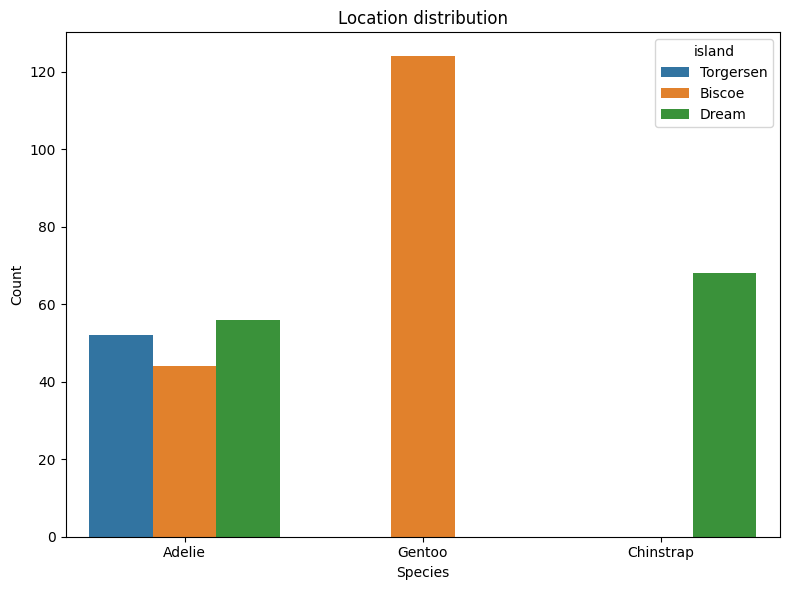

In [68]:
# Adjusting the size of the plot
plt.figure(figsize=(8, 6))
sns.countplot(data=cdata, x='species', hue='island')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title("Location distribution")

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

We can see that the different species are all of them  located only in one island

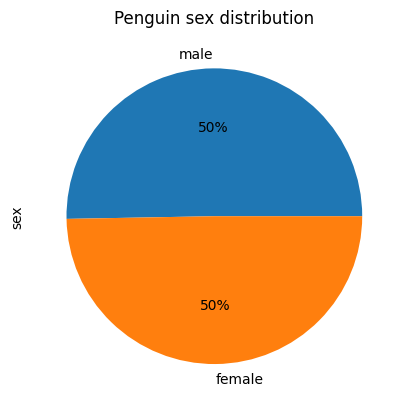

In [69]:
cdata['sex'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Penguin sex distribution')
plt.show()

The distribution of females and males in the study is balanced

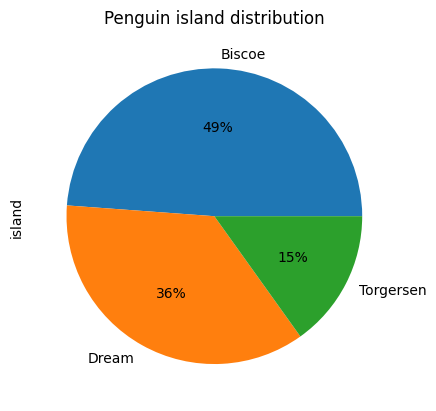

In [70]:
cdata['island'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Penguin island distribution')
plt.show()

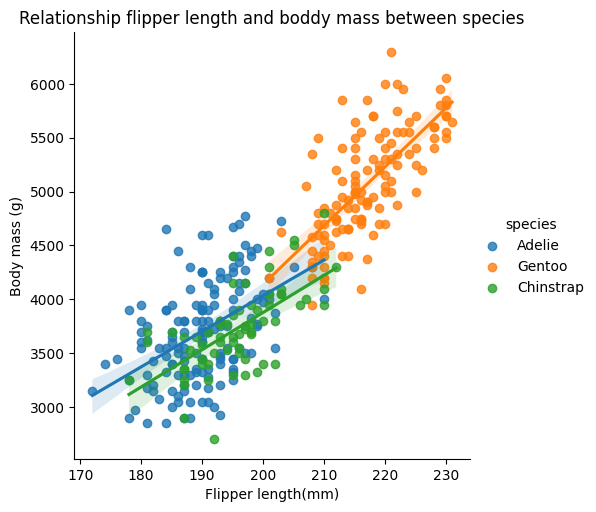

In [71]:
# Sample data
sns.lmplot(data=cdata, x='flipper_length_mm', y='body_mass_g', hue='species')

# Adding plot title and labels
plt.title('Relationship flipper length and boddy mass between species')
plt.xlabel('Flipper length(mm)')
plt.ylabel('Body mass (g)')

# Displaying the plot
plt.show()

Gentoo penguins are bigger than Adelie and Chinstrap. On the other hand, for those smaller we can see their body mass and flipper length tends to be similar. For the 3  species, there's a strong correlation between these variables.

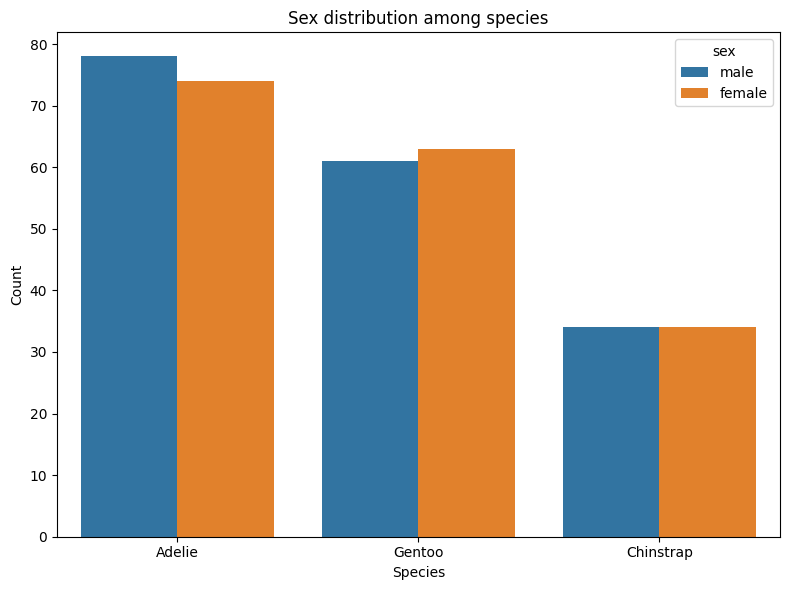

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(data=cdata, x='species', hue='sex')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title("Sex distribution among species")

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

As said before, the distribution among the species and gender is balanced.

<ipython-input-73-c6ada6e45b25>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cdata.corr()


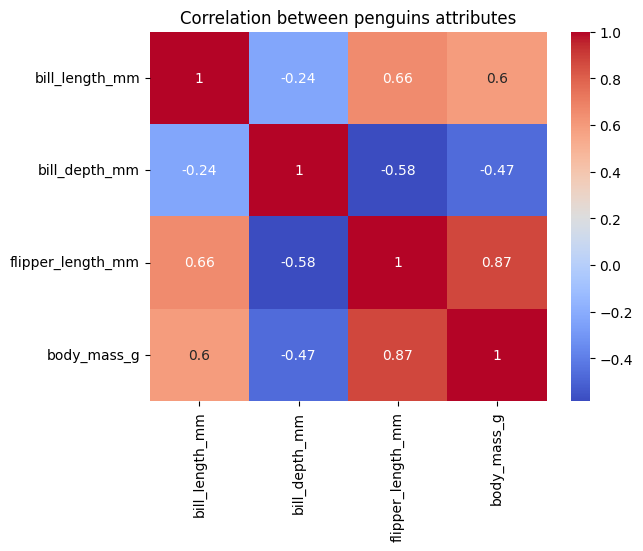

In [73]:
# Calculating the correlation matrix
correlation_matrix = cdata.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between penguins attributes")
plt.show()

Attributes like flipper length, bill length, and body mass reveals strong correlations. This helps to identify more easily the species by highlighting key physical attributes.

<ipython-input-75-d1e8a3092599>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=cdata, x='species', y='flipper_length_mm', palette=species_palette)
<ipython-input-75-d1e8a3092599>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 1], data=cdata, x='species', y='body_mass_g', palette=species_palette)
<ipython-input-75-d1e8a3092599>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], data=cdata, x='species', y='bill_length_mm', palette=species_palette)
<ipython-input-75-d1e8a3092599>:12: FutureWarni

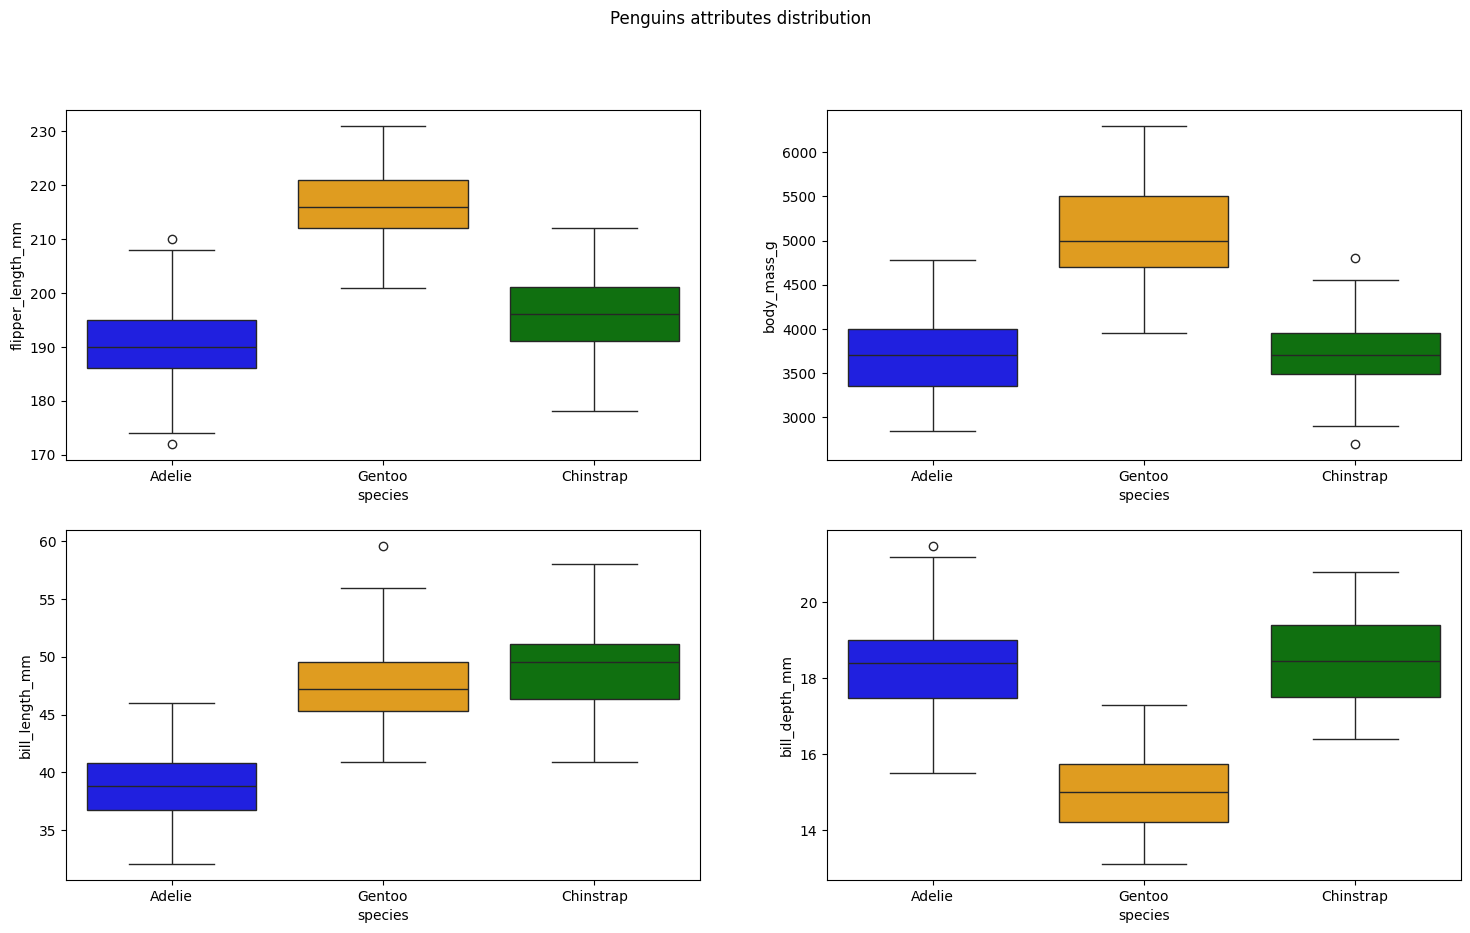

In [75]:
# Define a color palette for each species
species_palette = {'Adelie': 'blue', 'Chinstrap': 'green', 'Gentoo': 'orange'}

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Penguins attributes distribution')

# Plot boxplots for each attribute with species-specific colors
sns.boxplot(ax=axes[0, 0], data=cdata, x='species', y='flipper_length_mm', palette=species_palette)
sns.boxplot(ax=axes[0, 1], data=cdata, x='species', y='body_mass_g', palette=species_palette)
sns.boxplot(ax=axes[1, 0], data=cdata, x='species', y='bill_length_mm', palette=species_palette)
sns.boxplot(ax=axes[1, 1], data=cdata, x='species', y='bill_depth_mm', palette=species_palette)

plt.show()


Text(0.5, 1.0, 'Histogram of Flipper Length (mm)')

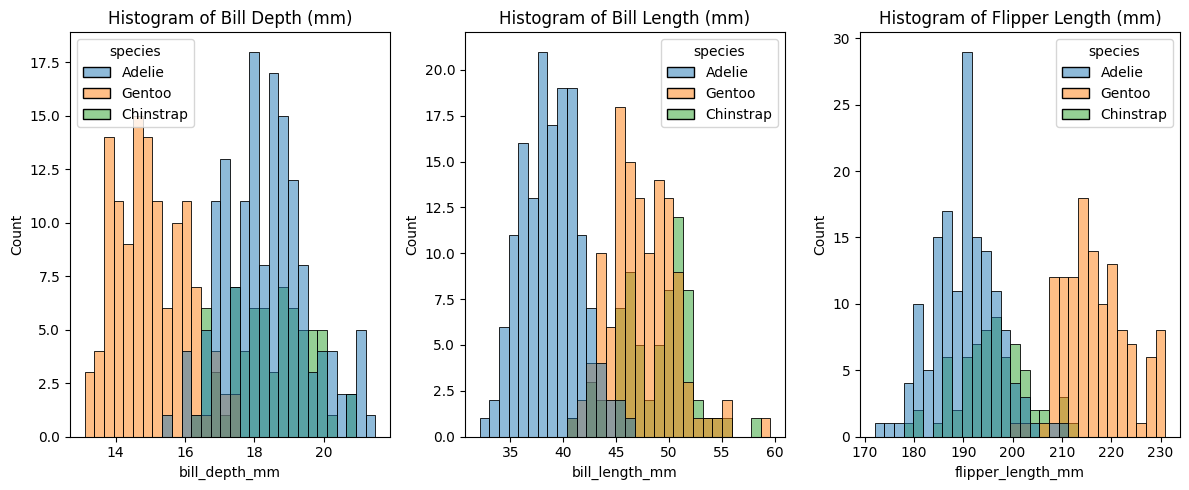

In [89]:
# Create subplots for bill_depth_mm and bill_length_mm
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot histograms with species as hue
sns.histplot(data=cdata, x='bill_depth_mm', hue='species', bins=30, alpha=0.5, ax=axes[0])
axes[0].set_title("Histogram of Bill Depth (mm)")
sns.histplot(data=cdata, x='bill_length_mm', hue='species', bins=30, alpha=0.5, ax=axes[1])
axes[1].set_title("Histogram of Bill Length (mm)")
sns.histplot(data=cdata, x='flipper_length_mm', hue='species', bins=30, alpha=0.5, ax=axes[2])
axes[2].set_title("Histogram of Flipper Length (mm)")

Based on the Histogram results it can be seen that the Adele species are the ones with the biggest attributes among penguins, while the Chinstrap is the opposite

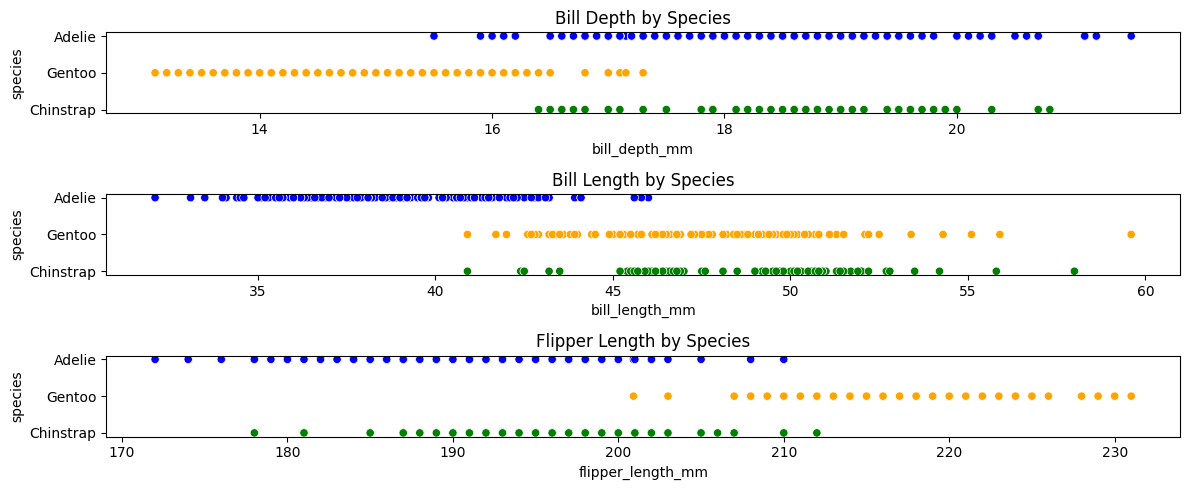

In [96]:
# Create a figure and a set of subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 5))

# Define species palette
species_palette = {'Adelie': 'blue', 'Chinstrap': 'green', 'Gentoo': 'orange'}

# First subplot: Bill depth by species
sns.scatterplot(data=cdata, x='bill_depth_mm', y='species', hue='species', palette=species_palette, ax=ax1,legend=False)
ax1.set_title('Bill Depth by Species')

# Second subplot: Bill length by species
sns.scatterplot(data=cdata, x='bill_length_mm', y='species', hue='species', palette=species_palette, ax=ax2, legend=False)
ax2.set_title('Bill Length by Species')

# Third subplot: Flipper length by species
sns.scatterplot(data=cdata, x='flipper_length_mm', y='species', hue='species', palette=species_palette, ax=ax3, legend=False)
ax3.set_title('Flipper Length by Species')

# Adjust layout to prevent overlapping titles
plt.tight_layout()


# Show the figure
plt.show()

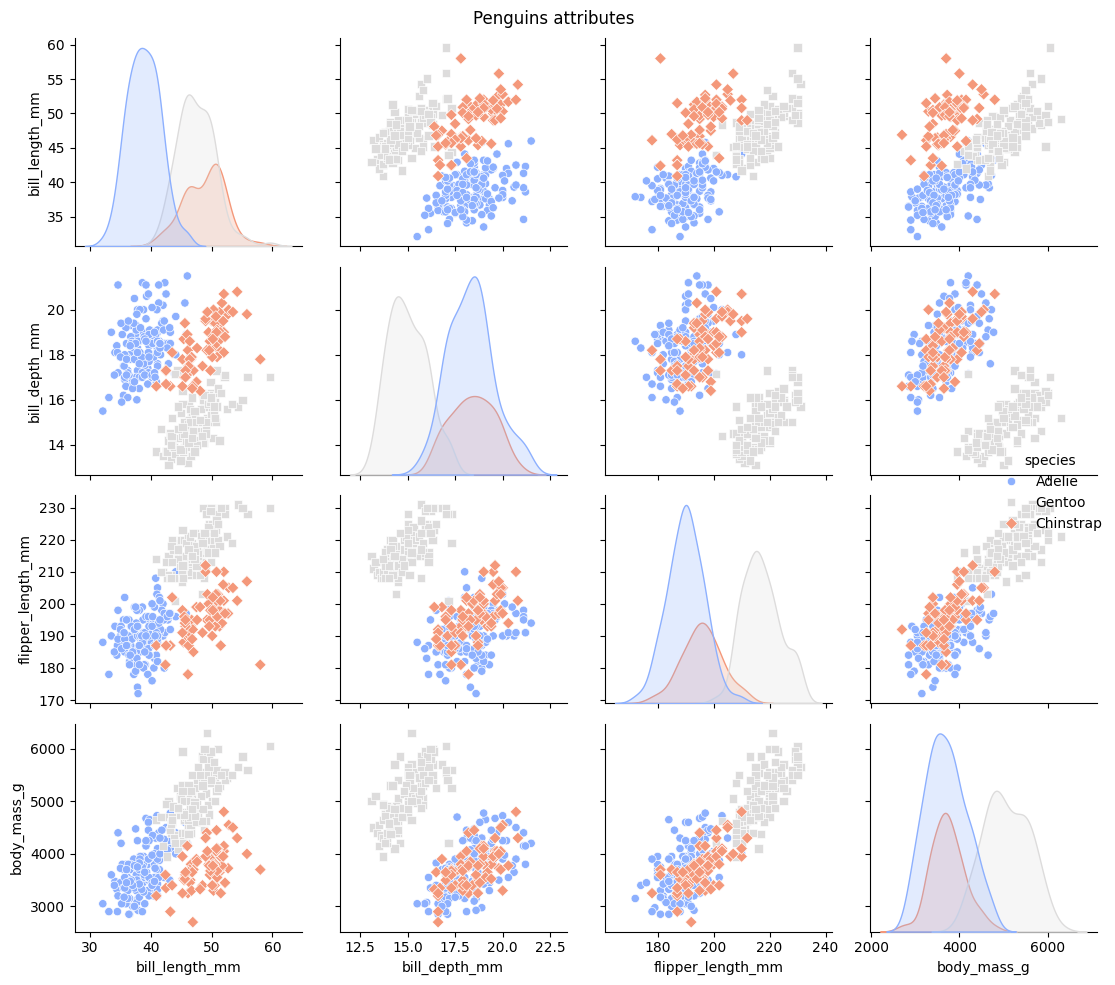

In [99]:

sns.pairplot(cdata, hue='species', palette='coolwarm', markers = ['o','s','D'])
plt.suptitle('Penguins attributes')

# Adjust layout to prevent overlapping titles
plt.tight_layout()


# Show the figure
plt.show()